## Предисловие

Нужно положить картинку рядом с ноутбуком.

In [145]:
IMG_FILE = "img.webp"  # name of the file, with extension (e.g. .png)
wavelet = "bior1.3"

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pywt

#### Задание 1

[]

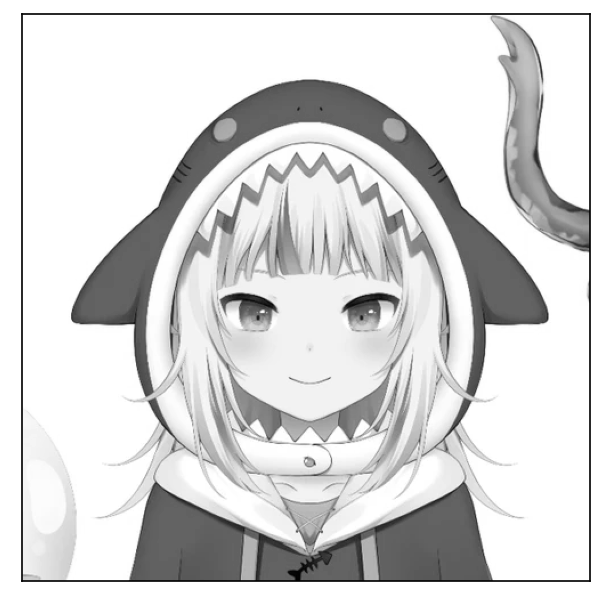

In [147]:
# load image
img = Image.open(IMG_FILE).convert('L')
data = np.asarray(img)

# and plot it
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=150)
ax.imshow(data, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])

In [148]:
# calc coeffs
coeffs = pywt.wavedec2(data, wavelet, level=2)
# cA - approximation coeff
# cH - horizontal detail coeff
# cV - vertical detail coeff
# cD - diagonal detail coeff
cA, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs

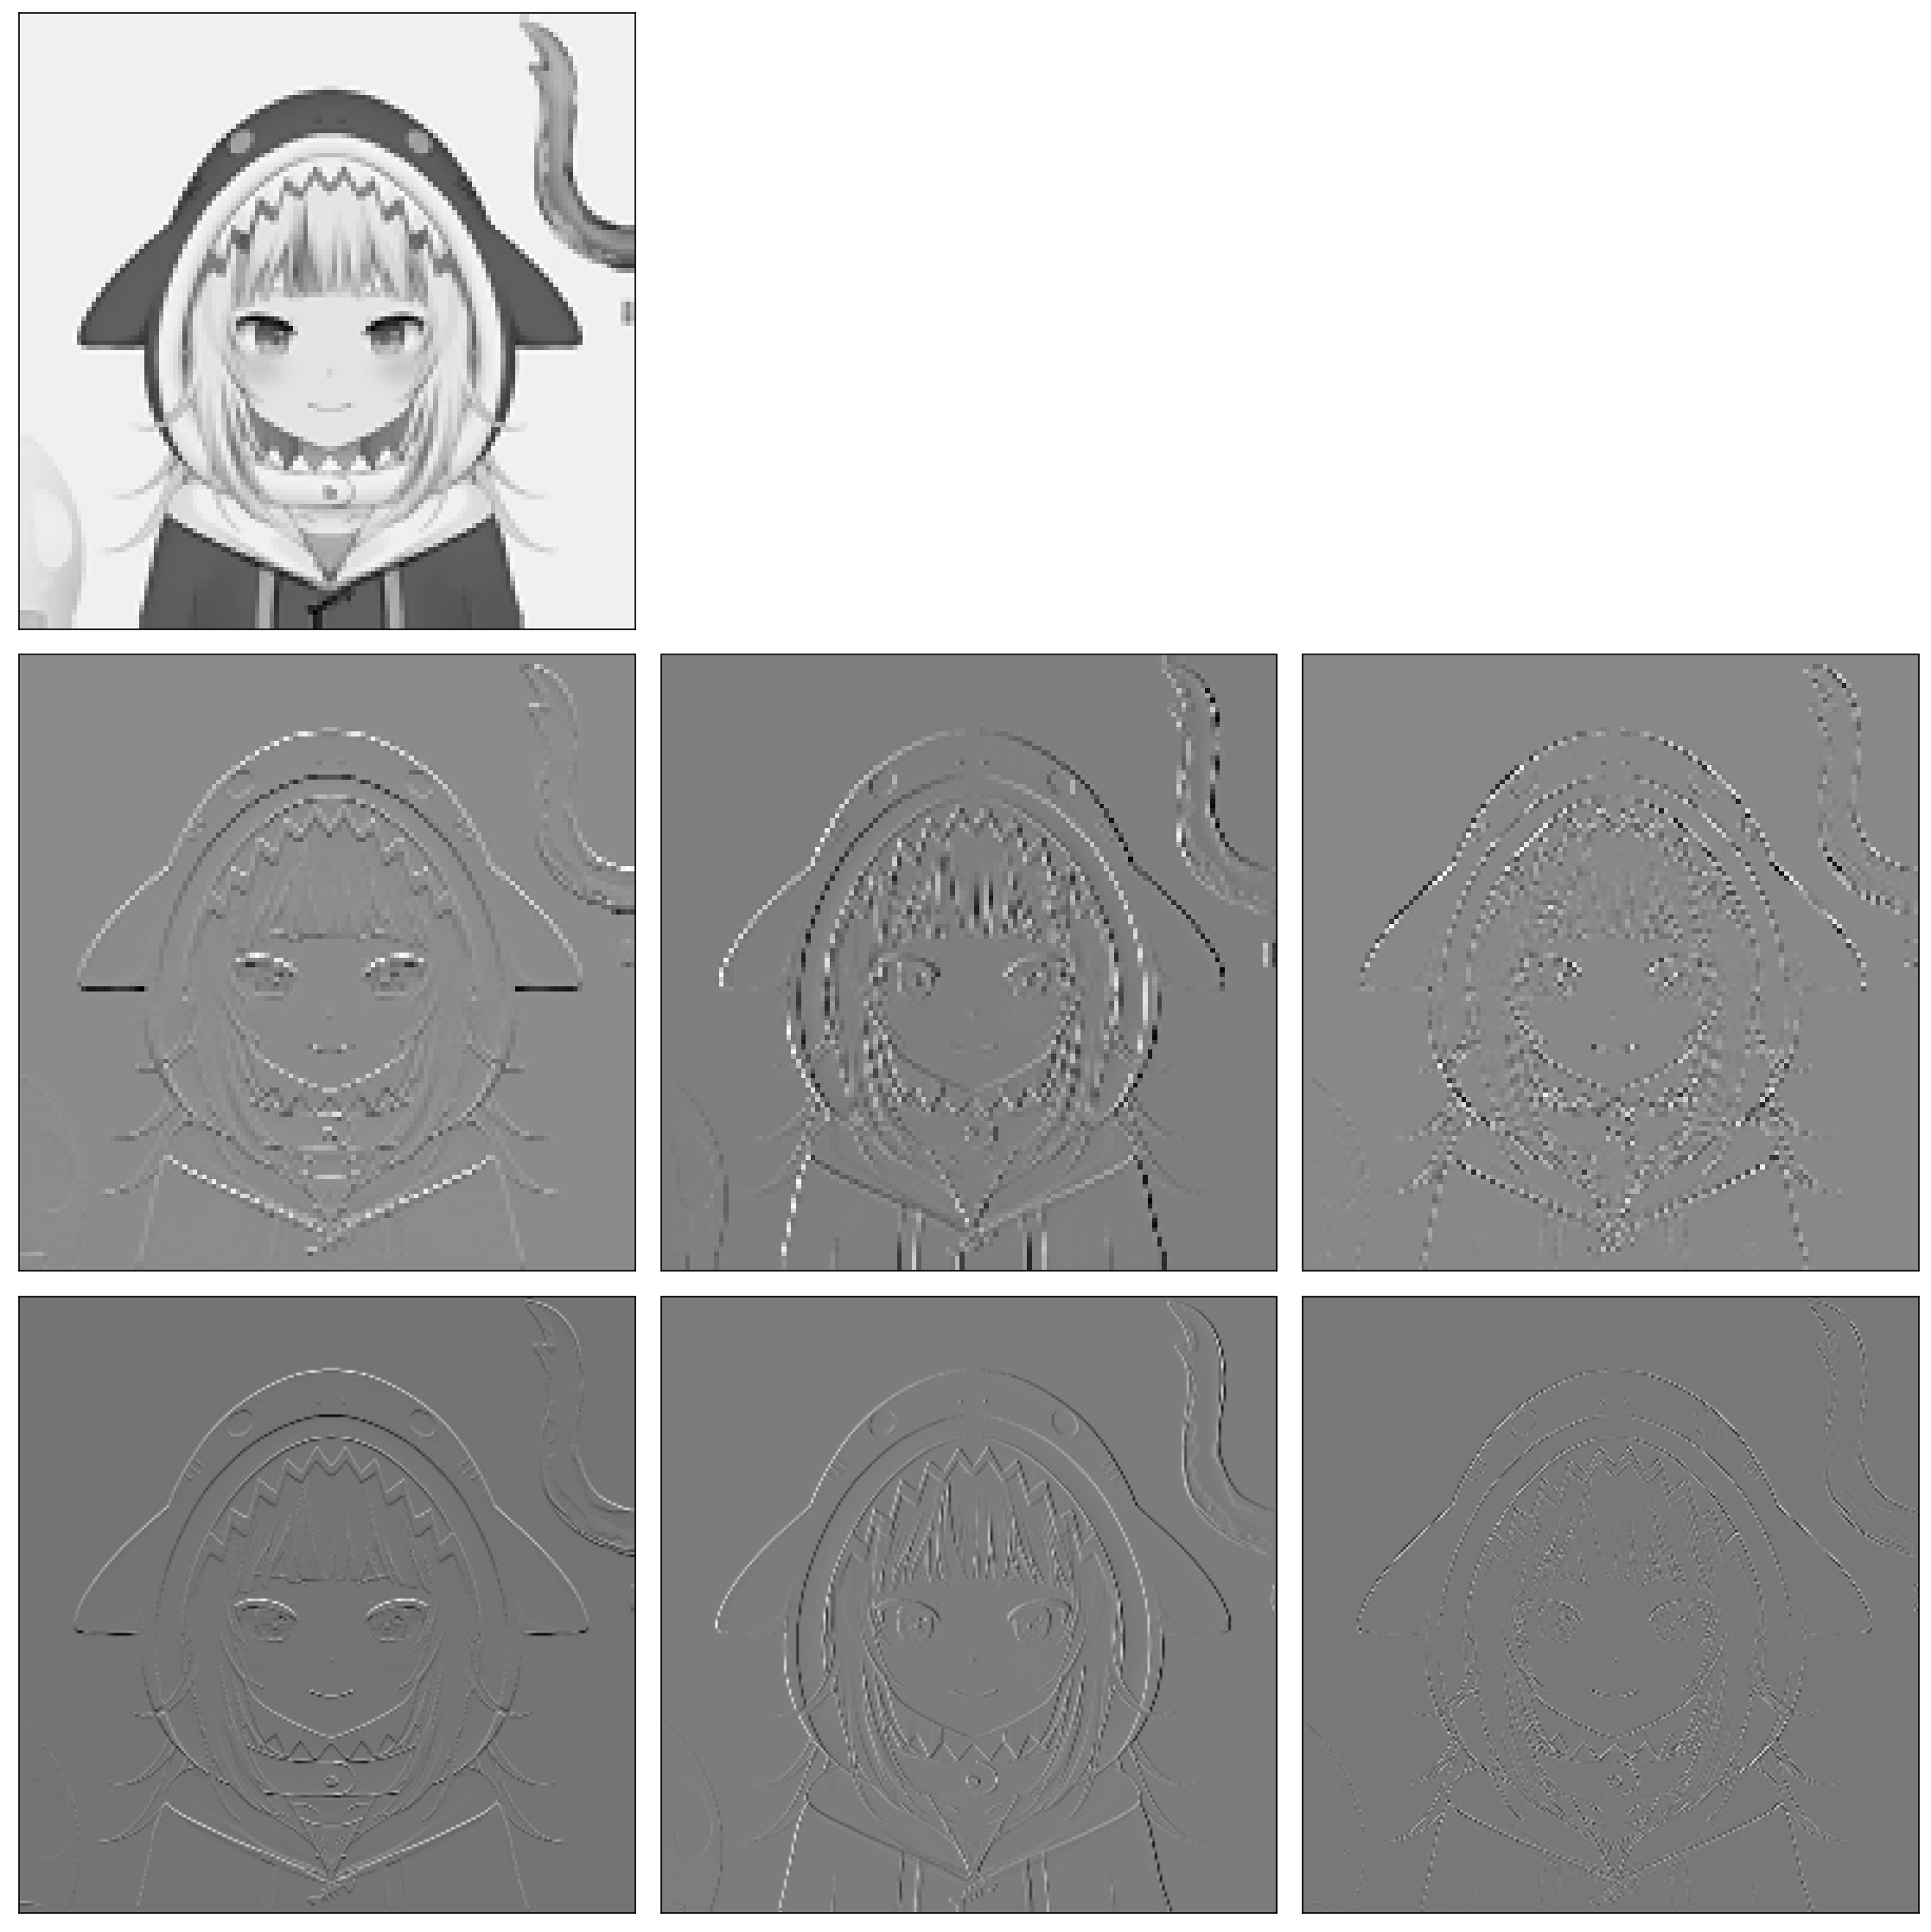

In [149]:
l = (cA, cH2, cV2, cD2, cH1, cV1, cD1)

fig = plt.figure(figsize=(15, 15), dpi=150)
for i, a in enumerate(l):
    if i == 0:  # to make first row contain single img
        ax = fig.add_subplot(3, 3, 1)
    else:
        ax = fig.add_subplot(3, 3, i + 3)
    ax.imshow(a, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

[]

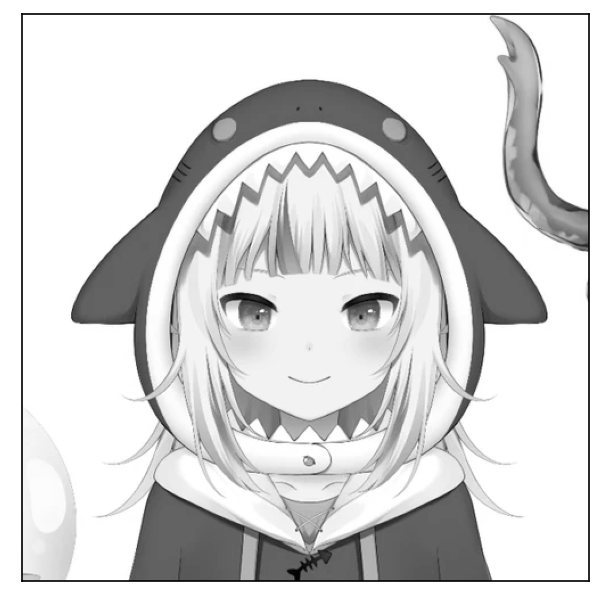

In [150]:
# reconstruct image
synth = pywt.waverec2(coeffs, wavelet)

# and plot it
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=150)
ax.imshow(synth, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])

#### Задание 2

In [151]:
# copy-paste from hw_2
class hw_2:
    def __init__(self) -> None:
        self.N = 6 # Your variant number

        if self.N % 2 == 0:
            self.A = 15 * self.N
            self.B = self.N
            self.fc = 3_000 * self.N
            self.fm = 100 * self.N
        else:
            self.A = 10 * self.N
            self.B = 2 * self.N
            self.fc = 2_000 * self.N
            self.fm = 150 * self.N

        self.fs = 5 * self.fc # Sampling frequency

    def am_signal(self, t: list[float], noise: bool = True, noise_scale: float = 0.3) -> list[float]:
        """Evaluate am-signal at specific values."""
        carrier = self.A * np.sin(2 * np.pi * self.fc * t)
        message = self.B * np.sin(2 * np.pi * self.fm * t)
        signal = (1 + message / self.A) * carrier
        if noise:
            signal += np.random.normal(0, noise_scale * self.B, signal.shape)
        return signal
    
    

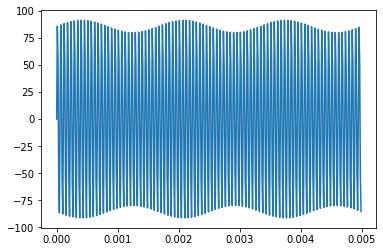

In [152]:
hw2 = hw_2()
t = np.arange(15 * hw2.fc / hw2.fm) / hw2.fs
# generate two signals for later use
am_without_noise = hw2.am_signal(t, False)
am_with_noise = hw2.am_signal(t)

# and plot it
plt.plot(t, am_without_noise)

In [153]:
# discrete wavelet transform
coeffs = pywt.wavedec(am_without_noise, wavelet, level=3)

In [154]:
# inverse discrete wavelet transform
synth = pywt.waverec(coeffs, wavelet)

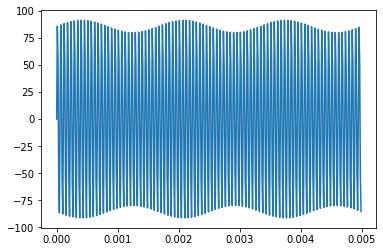

In [155]:
# plot result of inverse transform to make sure it's the same as original
plt.plot(t, synth)

#### Задание 3

Убрать шум с помощью вейвлет преобразования.

Я не справился. Не уверен как надо делать. Просто обнулить коэф. детализации не особо помогает. Может быть надо использовать ```pywt.threshold```, не уверен.

In [156]:
coeffs = pywt.wavedec(am_with_noise, wavelet, level=3)

In [157]:
# coeffs[3] = np.zeros_like(coeffs[3])
# coeffs[2] = np.zeros_like(coeffs[2])

In [158]:
# threshold = 0.1
for i in range(2, 4):
    threshold = np.percentile(np.abs(coeffs[i]), 70)
    mask = coeffs[i] > threshold
    # print(threshold, np.sum(mask))
    coeffs[i][mask] = 0

In [159]:
synth = pywt.waverec(coeffs, wavelet)

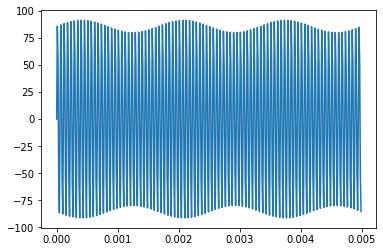

In [160]:
plt.plot(t, am_without_noise)

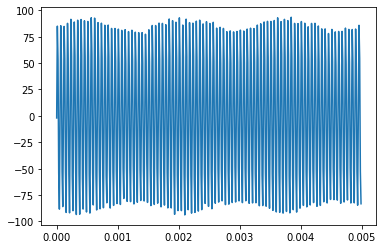

In [161]:
plt.plot(t, am_with_noise)

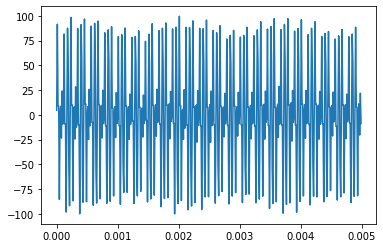

In [162]:
plt.plot(t, synth)

#### Задание 4

Не сделал.